* ### Author: Abhisek Saha

* #### The dataset has images of different flowers. It has six categories: 'daisy', 'dandelion', 'roses', 'sunflowers', and 'tulips'

* #### The details about the dataset can be found here: https://www.tensorflow.org/datasets/catalog/tf_flowers

* #### All images in this archive are licensed under the Creative Commons By-Attribution License, available at: https://creativecommons.org/licenses/by/2.0/       The photographers are listed below, thanks to all of them for making their work available, and please be sure to credit them for any use as per the license.

* #### Motivation: We will try to buil two simple CNN models, one with the original data and the other with the augmented data. The data augmentation will be done using 'keras.experimental.preprocessing' library. We will compare the perforrmance of both these models and find that which one performs better.

In [1]:
import tensorflow as tf
import PIL
import cv2
import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

In [ ]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 27s 0us/step


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [4]:
!ls

animal10			 Maleria_cell_images.zip
animal10Predictor_weights.hdf5	 model.h5
archive.zip			 __pycache__
cats_and_dogs_filtered		 raw-img
cell_images			 raw-intel-images
chest_xray			 Tf_flower_images
chest_xray.zip			 tf_flowers_predictor.h5
flower_photos			 tomato-leaf_disease
flower_photos.tar.gz		 tomato_leaf_disease_predictor.h5
intelimage_mobilenet_weights.h5  tomato_leaf.zip
intel_images.zip		 translate.py
malaria_mobilenet_weights.h5


In [ ]:
!tar -xvf flower_photos.tar.gz

In [ ]:
!mv flower_photos/LICENSE.txt /home/abhisek/python_exam/DeepLearning/CodeBasics/Flower_images/

In [5]:
!ls flower_photos/

daisy  dandelion  roses  sunflowers  tulips


In [5]:
for dirs in glob.glob('flower_photos/*'):
    print(dirs)

flower_photos/roses
flower_photos/sunflowers
flower_photos/tulips
flower_photos/daisy
flower_photos/dandelion


In [ ]:
os.remove('flower_photos/LICENSE.txt') 

In [7]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/Data/flower_photos/"

In [8]:
glob.glob('flower_photos/*/*.jpg')[:5]

['flower_photos/roses/14810868100_87eb739f26_m.jpg',
 'flower_photos/roses/1446090416_f0cad5fde4.jpg',
 'flower_photos/roses/15319767030_e6c5602a77_m.jpg',
 'flower_photos/roses/15032112248_30c5284e54_n.jpg',
 'flower_photos/roses/7211616670_2d49ecb3a5_m.jpg']

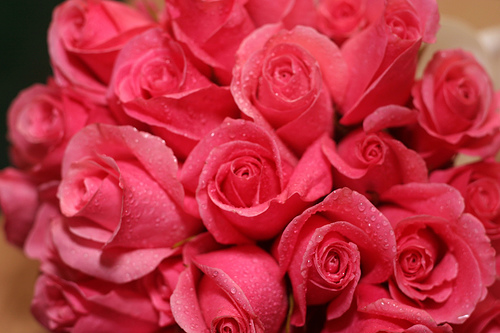

In [9]:
PIL.Image.open(str(glob.glob('flower_photos/*/*.jpg')[1]))

In [10]:
for dir in os.listdir(base_dir):
  print(dir, len(os.listdir(base_dir+dir)))

roses 641
sunflowers 699
tulips 799
daisy 633
dandelion 898


## Checking some random images

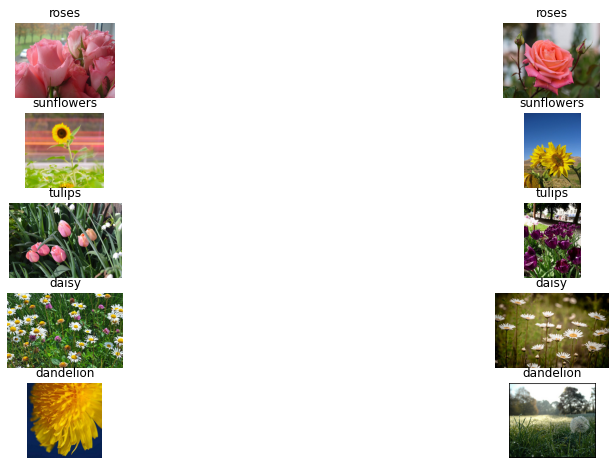

In [11]:
import random
k=1
plt.figure(figsize=(16,8))
for dir in os.listdir(base_dir):
  for i in range(2):
    random_img = random.sample(os.listdir(base_dir+dir),1)
    img =  mpimg.imread(base_dir+dir+'/'+random_img[0])
    plt.subplot(5,2,k)
    plt.imshow(img)
    plt.title(dir)
    plt.axis('off')
    k+=1

In [12]:
roses = list(glob.glob('flower_photos/roses/*'))

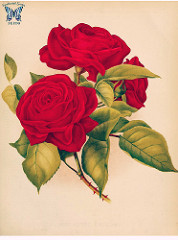

In [13]:
PIL.Image.open(str(roses[0]))

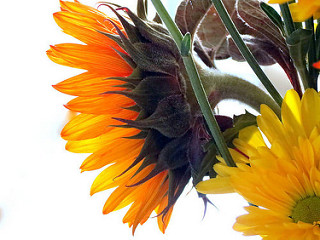

In [14]:
sunflowers = list(glob.glob('flower_photos/sunflowers/*'))
PIL.Image.open(sunflowers[0])

In [15]:
# Saving names of the files and their directories in a python dictionary
flower_image_dict = {
    'roses': list(glob.glob('flower_photos/roses/*')),
    'sunflowers': list(glob.glob('flower_photos/sunflowers/*')),
    'tulips': list(glob.glob('flower_photos/tulips/*')),
    'daisy': list(glob.glob('flower_photos/daisy/*')),
    'dandelion': list(glob.glob('flower_photos/dandelion/*')),
}

In [16]:
# Saving labels in a dictionary with their encoded keys
flower_labels_dict = {
    'roses':0,
    'sunflowers':1,
    'tulips':2,
    'daisy':3,
    'dandelion':4
}

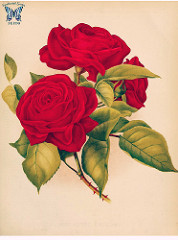

In [17]:
PIL.Image.open(str(flower_image_dict['roses'][0]))

In [18]:
flower_image_dict['roses'][:5]

['flower_photos/roses/14810868100_87eb739f26_m.jpg',
 'flower_photos/roses/1446090416_f0cad5fde4.jpg',
 'flower_photos/roses/15319767030_e6c5602a77_m.jpg',
 'flower_photos/roses/15032112248_30c5284e54_n.jpg',
 'flower_photos/roses/7211616670_2d49ecb3a5_m.jpg']

In [19]:
img = cv2.imread(str(flower_image_dict['roses'][1]))

In [20]:
img.shape

(333, 500, 3)

In [21]:
(cv2.resize(img, (180,180))/255.).shape

(180, 180, 3)

In [22]:
# Saving images and their labels in separate lists 
flowers = []
labels = []

for key,images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    img_resized = cv2.resize(img, (180,180))/255.
    flowers.append(img_resized)
    labels.append(flower_labels_dict[key])

In [23]:
X = np.array(flowers)
y = np.array(labels)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting model with original data

In [25]:
model = keras.Sequential([
                          Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(180,180,3)),
                          MaxPooling2D(pool_size=(2,2)),

                          Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
                          MaxPooling2D(pool_size=(2,2)),

                          Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                          MaxPooling2D(pool_size=(2,2)),

                          Flatten(),
                          Dense(128, activation='relu'),
                          Dense(5)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [26]:
model.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 87s 933ms/step - loss: 1.6550 - accuracy: 0.2200
Epoch 2/5
92/92 [==============================] - 86s 933ms/step - loss: 1.6094 - accuracy: 0.2204
Epoch 3/5
92/92 [==============================] - 87s 943ms/step - loss: 1.6094 - accuracy: 0.2204
Epoch 4/5
92/92 [==============================] - 86s 939ms/step - loss: 1.6094 - accuracy: 0.2204
Epoch 5/5
92/92 [==============================] - 86s 934ms/step - loss: 1.6094 - accuracy: 0.2204


In [28]:
augmented_data = keras.Sequential([
                                   keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
                                   keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                   keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [29]:
X[0].shape

(180, 180, 3)

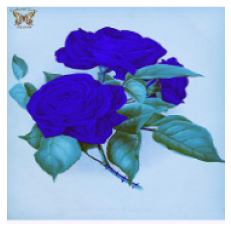

In [30]:
plt.imshow(X[0])
plt.axis('off')
plt.show()

In [31]:
#plt.imshow(augmented_data(X)[0].numpy().astype("uint8"))
#plt.axis('off')
#plt.show()

# Making model based on image Augmentaion

In [32]:
model_aug = keras.Sequential([
                              augmented_data,
                              Conv2D(16, 3, padding='same', activation='relu'),
                              MaxPooling2D(),
                              Conv2D(32, 3, padding='same', activation='relu'),
                              MaxPooling2D(),
                              Conv2D(64, 3, padding='same', activation='relu'),
                              MaxPooling2D(),
                              Dropout(0.2),
                              Flatten(),
                              Dense(128, activation='relu'),
                              Dense(5)
])

model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [33]:
model_aug.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [34]:
hist_aug = model_aug.fit(X_train, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 102s 1s/step - loss: 1.3091 - accuracy: 0.4302
Epoch 2/30
92/92 [==============================] - 100s 1s/step - loss: 1.0358 - accuracy: 0.6015
Epoch 3/30
92/92 [==============================] - 100s 1s/step - loss: 0.9158 - accuracy: 0.6553
Epoch 4/30
92/92 [==============================] - 100s 1s/step - loss: 0.8524 - accuracy: 0.6778
Epoch 5/30
92/92 [==============================] - 100s 1s/step - loss: 0.8147 - accuracy: 0.6795
Epoch 6/30
92/92 [==============================] - 100s 1s/step - loss: 0.7825 - accuracy: 0.7016
Epoch 7/30
92/92 [==============================] - 100s 1s/step - loss: 0.7343 - accuracy: 0.7142
Epoch 8/30
92/92 [==============================] - 100s 1s/step - loss: 0.7193 - accuracy: 0.7241
Epoch 9/30
92/92 [==============================] - 100s 1s/step - loss: 0.6983 - accuracy: 0.7340
Epoch 10/30
92/92 [==============================] - 99s 1s/step - loss: 0.6712 - accuracy: 0.7398
Epoch 11/3

In [36]:
model_aug.evaluate(X_test, y_test)

23/23 [==============================] - 7s 278ms/step - loss: 0.8468 - accuracy: 0.7425


[0.8468317985534668, 0.7425068020820618]

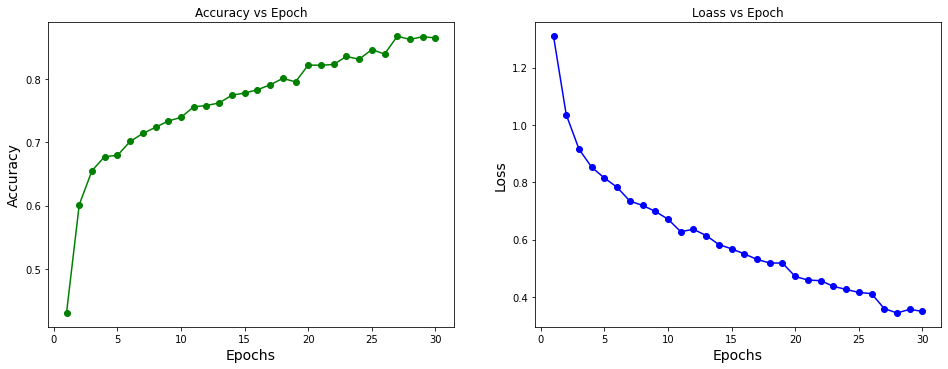

In [35]:
acc = hist_aug.history['accuracy']
loss = hist_aug.history['loss']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(16,5.6))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'go-')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Epoch")

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo-')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loass vs Epoch")

plt.show()

In [49]:
y_test[0:5]

array([1, 0, 2, 4, 2])

In [38]:
model_aug.predict(X_test)[0]

array([-11.570227  ,   3.3804066 ,   0.39673856, -10.564265  ,
        -7.596203  ], dtype=float32)

In [39]:
#model_aug.save('tf_flowers_predictor.h5')

In [43]:
y_pred0 = tf.nn.softmax(model_aug.predict(X_test)[0:5])

In [53]:
y_pred0[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0589672e-07, 9.5181429e-01, 4.8168335e-02, 8.3648524e-07,
       1.6273143e-05], dtype=float32)>

In [62]:
[np.argmax(i) for i in y_pred0]

[1, 0, 2, 4, 2]

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


## Prediction Report

In [38]:
model_fl = keras.models.load_model('tf_flowers_predictor.h5')

In [39]:
model_fl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [40]:
from tensorflow.math import confusion_matrix

In [52]:
y_test.shape

(734,)

In [53]:
pred = tf.nn.softmax(model_fl.predict(X_test)[0:300])

In [54]:
y_pred = [np.argmax(i) for i in pred]

In [58]:
cm = confusion_matrix(labels=y_test[0:300], predictions=y_pred)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[47,  1, 14,  3,  1],
       [ 1, 44,  3,  0,  1],
       [12,  2, 52,  4,  1],
       [ 3,  5,  3, 33,  2],
       [ 1, 10,  5,  4, 48]], dtype=int32)>

In [59]:
row_sum = [np.sum(cm[i]) for i in range(cm.shape[0])]
row_sum

[66, 49, 71, 46, 68]

In [60]:
normalized_cm = np.array([cm[i]/np.sum(cm[i]) for i in range(cm.shape[0])])
normalized_cm

array([[0.71212121, 0.01515152, 0.21212121, 0.04545455, 0.01515152],
       [0.02040816, 0.89795918, 0.06122449, 0.        , 0.02040816],
       [0.16901408, 0.02816901, 0.73239437, 0.05633803, 0.01408451],
       [0.06521739, 0.10869565, 0.06521739, 0.7173913 , 0.04347826],
       [0.01470588, 0.14705882, 0.07352941, 0.05882353, 0.70588235]])

In [61]:
flower_labels_dict

{'daisy': 3, 'dandelion': 4, 'roses': 0, 'sunflowers': 1, 'tulips': 2}

In [62]:
flower_labels_list = list(flower_labels_dict.keys())

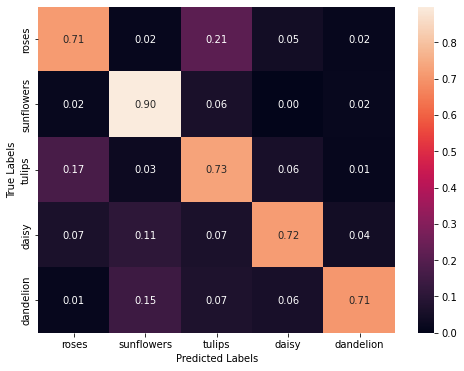

In [63]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.xticks([(i+0.5) for i in range(5)], [i for i in flower_labels_list])
plt.yticks([(i+0.5) for i in range(5)], [i for i in flower_labels_list])
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test[0:300], y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        66
           1       0.71      0.90      0.79        49
           2       0.68      0.73      0.70        71
           3       0.75      0.72      0.73        46
           4       0.91      0.71      0.79        68

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



## Conclusion: More than 70% score in precision,recall and f-score. So the model is able to perform much better after the data Augmentation